# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize


# Tiny Text Data

In [3]:
docs=["A video of government workers in Puducherry hurriedly throwing the body of a COVID positive man into a pit has caused massive outrage, prompting the administration to order a probe into the incident.",
      "The COVID pandemic has hit the world and the Vedanta Group business. It has incurred losses in oil, gas and mining sectors.",
      "Yuvraj Singh was diagnosed with a cancerous tumor in his left lung following India's World Cup triumph in 2011. He had scored 362 runs and claimed 15 wickets in the tournament and was bestowed with the Player of the Tournament award in the end",
      "Sonu Sood, known as a Bollywood actor, has emerged as the superhero during the COVID-19 pandemic. For thousands of migrants, he is the man who helped them at a time when they were gripped with fear and were walking an uncertain path with no support or even an assurance that all would be well.",
      "Toyota Kirloskar Motor (TKM) has announced one or two percent price increase in India for Toyota Glanza, Yaris, Innova Crysta, and the Fortuner.",
      "Facebook will invest Rs 43,574 crore in Jio Platforms, a unit of Reliance Industries Ltd (RIL), for a 9.99% stake, an allcash deal that will help the oil-toretail conglomerate reduce debt and strengthen the social media company's presence in its largest market, especially for itsWhatsApp unit."
     ]

In [4]:
docs

['A video of government workers in Puducherry hurriedly throwing the body of a COVID positive man into a pit has caused massive outrage, prompting the administration to order a probe into the incident.',
 'The COVID pandemic has hit the world and the Vedanta Group business. It has incurred losses in oil, gas and mining sectors.',
 "Yuvraj Singh was diagnosed with a cancerous tumor in his left lung following India's World Cup triumph in 2011. He had scored 362 runs and claimed 15 wickets in the tournament and was bestowed with the Player of the Tournament award in the end",
 'Sonu Sood, known as a Bollywood actor, has emerged as the superhero during the COVID-19 pandemic. For thousands of migrants, he is the man who helped them at a time when they were gripped with fear and were walking an uncertain path with no support or even an assurance that all would be well.',
 'Toyota Kirloskar Motor (TKM) has announced one or two percent price increase in India for Toyota Glanza, Yaris, Innova C

In [5]:
len(docs)

6

## Convert the collection of text documents to a matrix of tokens counts

In [7]:
cv = CountVectorizer()

word_count_vector = cv.fit_transform(docs)

In [9]:
word_count_vector.shape

(6, 153)

In [12]:
word_count_vector.toarray()[5]

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0])

In [13]:
cv.get_feature_names_out()

array(['15', '19', '2011', '362', '43', '574', '99', 'actor',
       'administration', 'all', 'allcash', 'an', 'and', 'announced', 'as',
       'assurance', 'at', 'award', 'be', 'bestowed', 'body', 'bollywood',
       'business', 'cancerous', 'caused', 'claimed', 'company',
       'conglomerate', 'covid', 'crore', 'crysta', 'cup', 'deal', 'debt',
       'diagnosed', 'during', 'emerged', 'end', 'especially', 'even',
       'facebook', 'fear', 'following', 'for', 'fortuner', 'gas',
       'glanza', 'government', 'gripped', 'group', 'had', 'has', 'he',
       'help', 'helped', 'his', 'hit', 'hurriedly', 'in', 'incident',
       'increase', 'incurred', 'india', 'industries', 'innova', 'into',
       'invest', 'is', 'it', 'its', 'itswhatsapp', 'jio', 'kirloskar',
       'known', 'largest', 'left', 'losses', 'ltd', 'lung', 'man',
       'market', 'massive', 'media', 'migrants', 'mining', 'motor', 'no',
       'of', 'oil', 'one', 'or', 'order', 'outrage', 'pandemic', 'path',
       'percent',

In [15]:
tfidf_transformer = TfidfTransformer()
tf_idf_vector = tfidf_transformer.fit_transform(word_count_vector)

In [16]:
feature_names = cv.get_feature_names_out()



In [24]:
first_document_vector = tf_idf_vector[2]
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
in,0.307338
was,0.299943
tournament,0.299943
the,0.266289
with,0.245958
...,...
innova,0.000000
industries,0.000000
incurred,0.000000
increase,0.000000


# Demo on Economic Data with PLSA

In [25]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Install PLSA

In [7]:
pip install plsa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import sys
import matplotlib.pyplot as plt

In [9]:
#sys.path.append('..')

In [10]:
directory = './data'

In [11]:
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/lib/python3.10/dist-
[nltk_data]     packages/plsa/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /usr/local/lib/python3.10/dist-
[nltk_data]     packages/plsa/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /usr/local/lib/python3.10/dist-
[nltk_data]     packages/plsa/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/local/lib/python3.10/dist-
[nltk_data]     packages/plsa/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [16]:
csv_file = './data/Full-Economic-News.csv'

In [17]:
pipeline = Pipeline(*DEFAULT_PIPELINE)
pipeline

Pipeline:
0: remove_non_ascii
1: to_lower
2: remove_numbers
3: tag_remover
4: punctuation_remover
5: tokenize
6: LemmatizeWords
7: RemoveStopwords
8: short_word_remover

In [18]:
corpus = Corpus.from_csv(csv_file, pipeline)
corpus

Corpus:
Number of documents: 1000
Number of words:     6431

# Run PLSA

In [19]:
n_topics = 5

# Instantiate the PLSA model

In [20]:
plsa = PLSA(corpus, n_topics, True)

In [21]:
plsa

PLSA:
====
Number of topics:     5
Number of documents:  1000
Number of words:      6431
Number of iterations: 0

# Train the model

In [22]:
# result = plsa.fit()
# plsa

In [23]:
result = plsa.best_of(5)

# Make Prediction

In [25]:
new_doc = 'Hello! This is the federal humpty dumpty agency for state funding.'

topic_components, number_of_new_words, new_words = result.predict(new_doc)
print('Relative topic importance in new document:', topic_components)
print('Number of previously unseen words in new document:', number_of_new_words)
print('Previously unseen words in new document:', new_words)


Relative topic importance in new document: [0.45308521 0.06675192 0.18819269 0.16983038 0.1221398 ]
Number of previously unseen words in new document: 2
Previously unseen words in new document: ('humpty', 'dumpty')


## Look at individual topics

In [26]:
result.word_given_topic[0][:10] 

(('dollar', 0.014427241427729604),
 ('bond', 0.012787322063222004),
 ('stock', 0.010061138359371134),
 ('rate', 0.00969329162217194),
 ('fed', 0.00884968363701589),
 ('bank', 0.008026042944109755),
 ('point', 0.008016623454591787),
 ('currency', 0.0078047782562652565),
 ('index', 0.007740636922660121),
 ('dow', 0.007117129774079949))

## Convergence

Since PLSA uses an iterative expectation-maximization (EM) style algorithm, let's make sure we have achieved reasonable convergence.


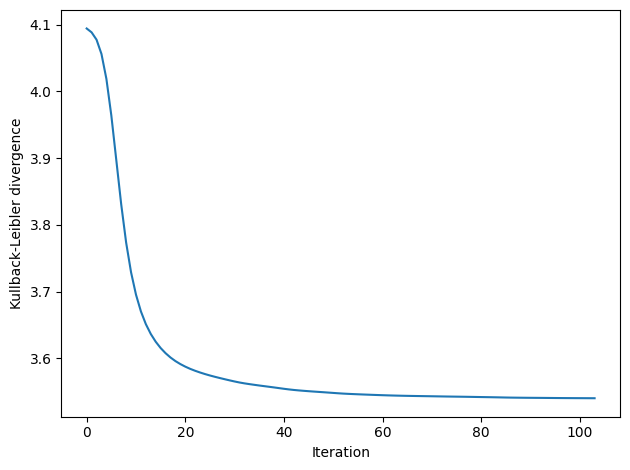

In [28]:
visualize = Visualize(result)
visualize
fig, ax = plt.subplots()
_ = visualize.convergence(ax)
fig.tight_layout()

## Relative topic importance

How important are the topics we found in the corpus?


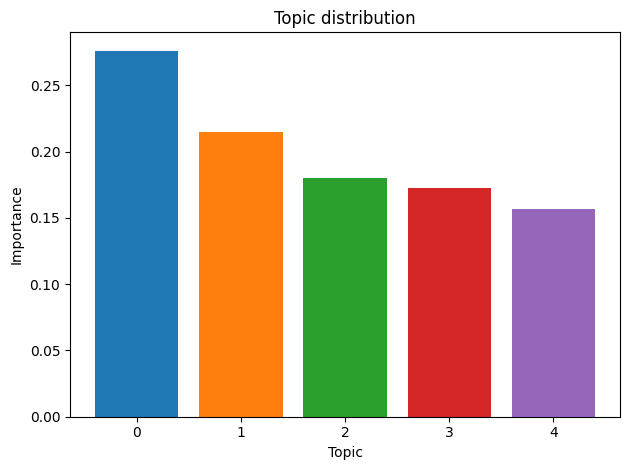

In [29]:
fig, ax = plt.subplots()
_ = visualize.topics(ax)
fig.tight_layout()

## The topics

The most interesting part is probably the topics themselves, We can visualize them as word clouds.


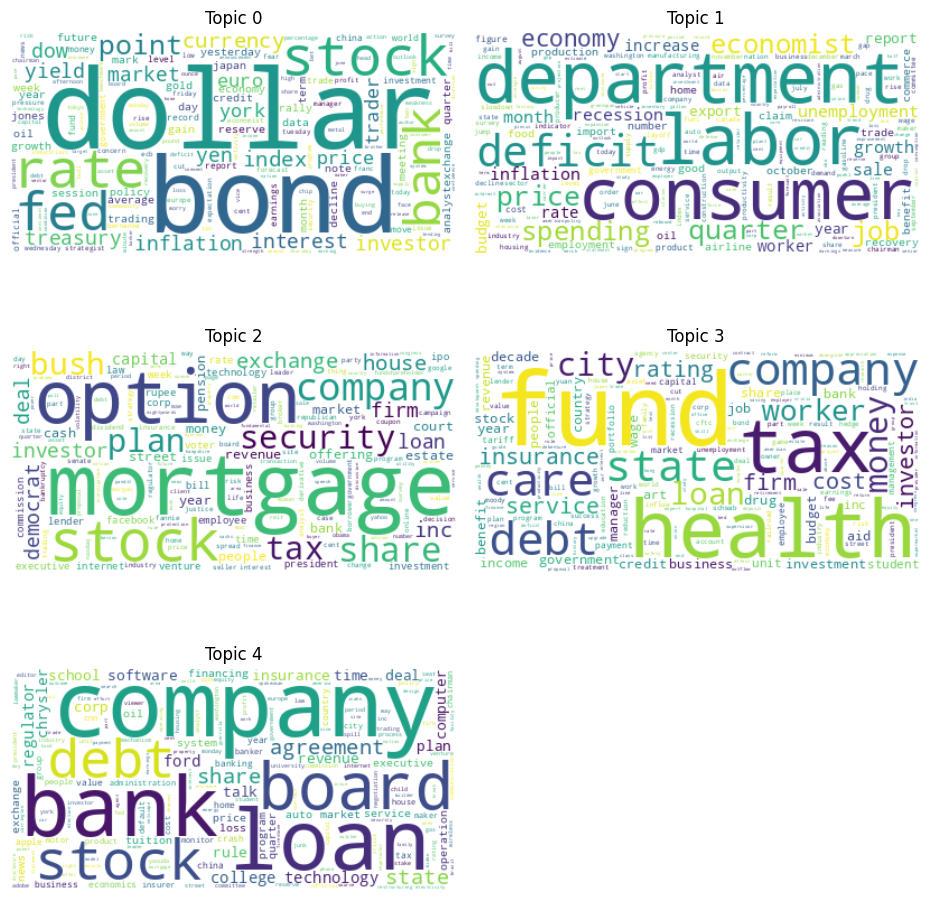

In [30]:
fig = plt.figure(figsize=(9.4, 10))
_ = visualize.wordclouds(fig)

## Relative topic importance in a document

Also interesting is the mixture of topics in each document. 

Let's look at the **first document**.


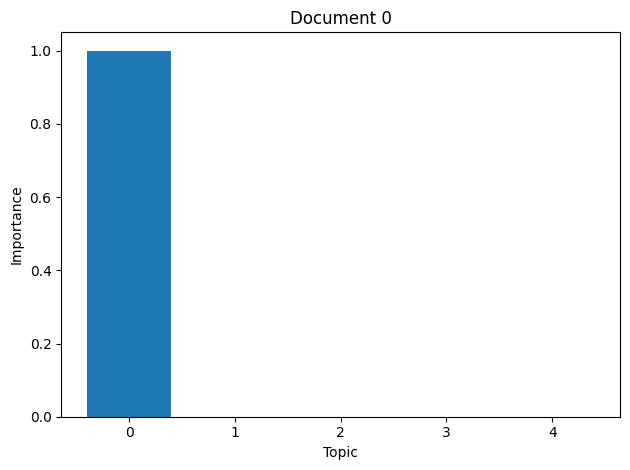

In [31]:
fig, ax = plt.subplots()
_ = visualize.topics_in_doc(0, ax)
fig.tight_layout()

Let's look at the **second document**.


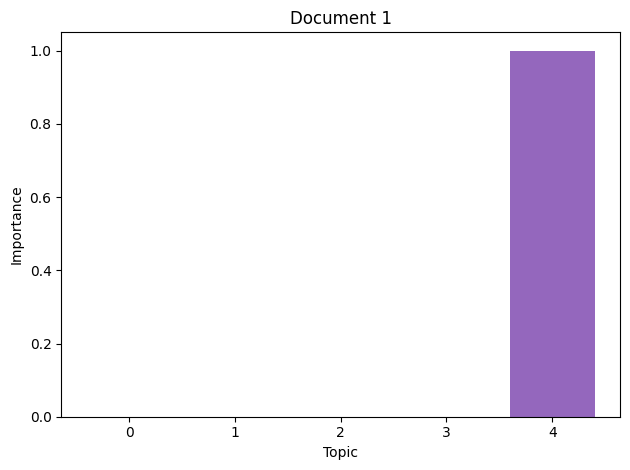

In [32]:
fig, ax = plt.subplots()
_ = visualize.topics_in_doc(1, ax)
fig.tight_layout()

Let's look at the **100-th document**.


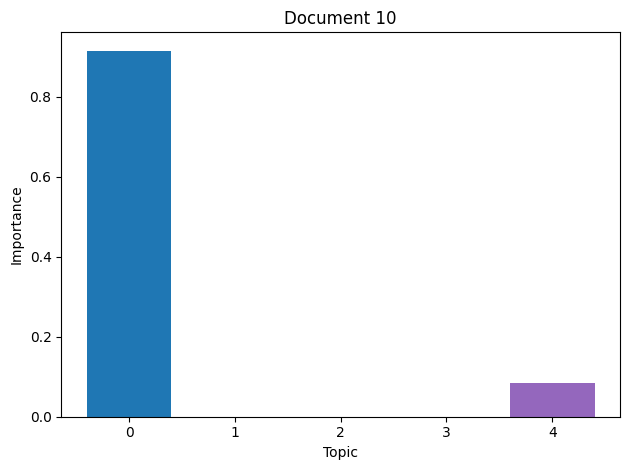

In [34]:
fig, ax = plt.subplots()
_ = visualize.topics_in_doc(10, ax)
fig.tight_layout()

# Predicting a new document

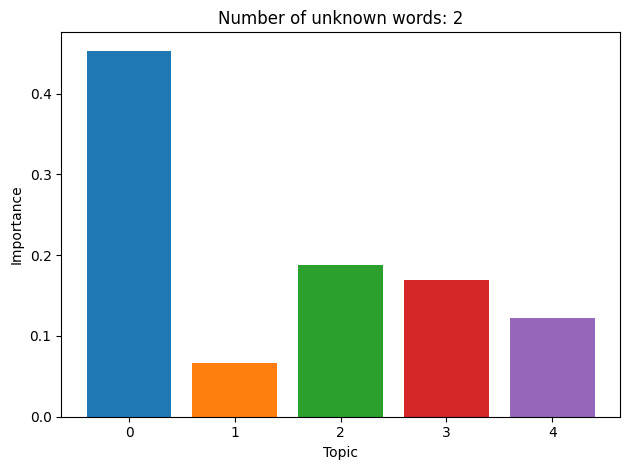

In [35]:
new_doc = 'Hello! This is the federal humpty dumpty agency for state funding.'

fig, ax = plt.subplots()
_ = visualize.prediction(new_doc, ax)
fig.tight_layout()

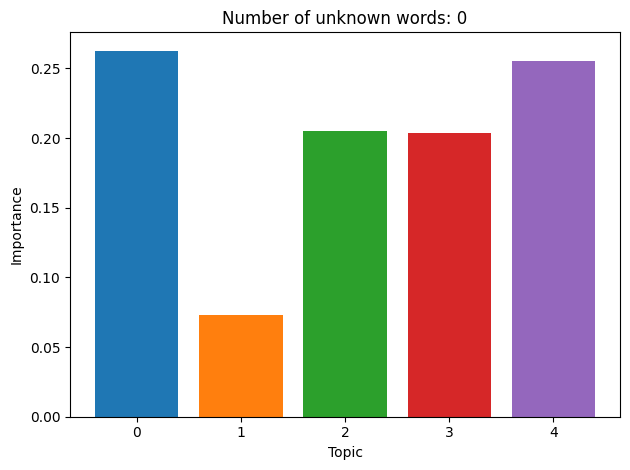

In [38]:
#new_doc = 'This is the sharesale company for dealing with stocks of gas.'

#new_doc = 'This is the sharesale company for dealing with the stocks of airline, gas.'

new_doc = 'This is the sharesale company working with bank, loan, stock.'


fig, ax = plt.subplots()
_ = visualize.prediction(new_doc, ax)
fig.tight_layout()